Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_features = pd.read_csv('training_set_features.csv')
print(train_features.shape)
train_labels = pd.read_csv('training_set_labels.csv')
print(train_labels.shape)
test_features = pd.read_csv('test_set_features.csv')
print(test_features.shape)

(26707, 36)
(26707, 3)
(26708, 36)


In [3]:
train_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Exploratory Data Analysis

In [4]:
train_features.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

<Axes: >

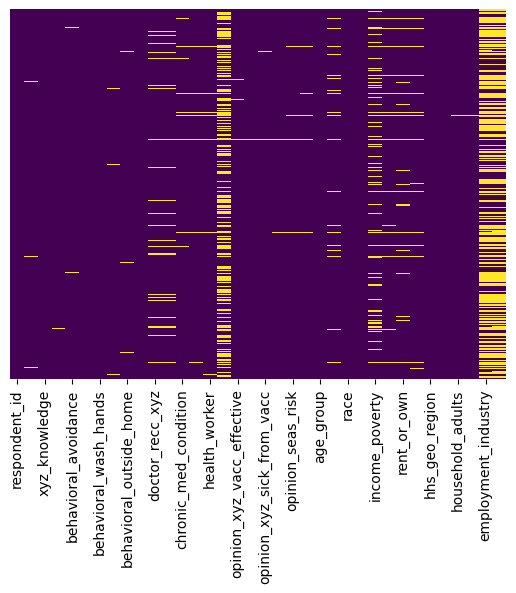

In [5]:
sns.heatmap(train_features.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
train_features_labels = pd.merge(train_features, train_labels, on='respondent_id', how='inner')
train_features_labels.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


C:\Users\paras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='employment_occupation', ylabel='Count'>

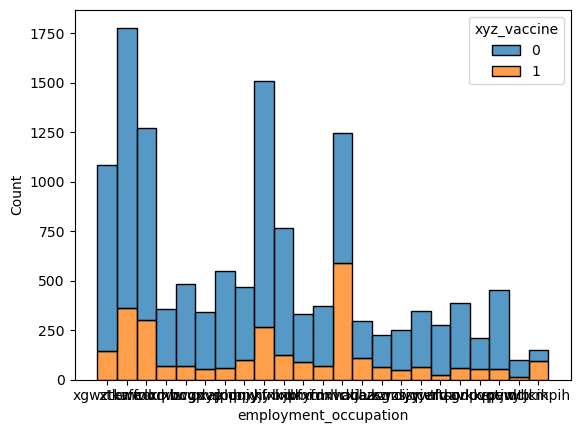

In [7]:
sns.histplot(train_features_labels, x='employment_occupation', hue='xyz_vaccine', multiple='stack')

In [8]:
X_train = train_features.drop(columns=['respondent_id'])
X_train.head()

X_test = test_features.drop(columns=['respondent_id'])
X_test.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [9]:
# Identify categorical and numerical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns

cat_col_indices = []
num_col_indices = []

for column in categorical_columns:
    cat_col_indices.append(train_features.columns.get_loc(column))
for column in numerical_columns:
    num_col_indices.append(train_features.columns.get_loc(column))
print(cat_col_indices)
print(num_col_indices)

[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 32, 33]


In [10]:
for column in categorical_columns:
    print(X_train[column].value_counts())

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64
education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64
race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64
sex
Female    15858
Male      10849
Name: count, dtype: int64
income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64
marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64
rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64
employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64
hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjc

In [11]:
cat_replace_missing_by_mode = np.array(['education','income_poverty','marital_status','rent_or_own'])
cat_replace_missing_by_missing = np.array(['employment_status','employment_industry','employment_occupation'])

#creating index arrays:
cat_replace_missing_by_mode_indices = []
cat_replace_missing_by_missing_indices = []

for column in cat_replace_missing_by_mode:
    cat_replace_missing_by_mode_indices.append(X_train.columns.get_loc(column))
for column in cat_replace_missing_by_missing:
    cat_replace_missing_by_missing_indices.append(X_train.columns.get_loc(column))
print(cat_replace_missing_by_mode_indices)
print(cat_replace_missing_by_missing_indices)

[22, 25, 26, 27]
[28, 33, 34]


In [12]:
num_replace_missing_by_mode = np.array(['behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance'])
num_replace_missing_by_median = np.array(['xyz_concern', 'xyz_knowledge','opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'])

#creating index arrays:
num_replace_missing_by_mode_indices = []
num_replace_missing_by_median_indices = []

for column in num_replace_missing_by_mode:
    num_replace_missing_by_mode_indices.append(X_train.columns.get_loc(column))
for column in num_replace_missing_by_median:
    num_replace_missing_by_median_indices.append(X_train.columns.get_loc(column))
print(num_replace_missing_by_mode_indices)
print(num_replace_missing_by_median_indices)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 15, 16, 17, 18, 19, 20, 31, 32]


In [13]:
print(categorical_columns)

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')


In [14]:
cat_col_nominal = np.array(['race','sex','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa', 'employment_industry', 'employment_occupation'])
cat_col_ordinal = np.array(['age_group', 'education','income_poverty'])

cat_col_nominal_indices = []
cat_col_ordinal_indices = []

for column in cat_col_nominal:
    cat_col_nominal_indices.append(X_train.columns.get_loc(column))
for column in cat_col_ordinal:
    cat_col_ordinal_indices.append(X_train.columns.get_loc(column))

print(cat_col_nominal_indices)
print(cat_col_ordinal_indices)

[23, 24, 26, 27, 28, 29, 30, 33, 34]
[21, 22, 25]


Preprocessing Data

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [16]:
#imputation transformer
trf1= ColumnTransformer([
    ('impute_numerical_mode', SimpleImputer(strategy='most_frequent'),num_replace_missing_by_mode_indices),
    ('impute_numerical_median', SimpleImputer(strategy='median'),num_replace_missing_by_median_indices),
    ('inpute_categorical_missing', SimpleImputer(strategy='constant', fill_value='missing'),cat_replace_missing_by_missing_indices),
    ('impute_categorical_mode',SimpleImputer(strategy='most_frequent'),cat_replace_missing_by_mode_indices)
],remainder='passthrough')

# X_train_trf1 = trf1.fit_transform(X_train)
# X_train_trf1.shape

In [17]:
#one hot encoding
trf2 = ColumnTransformer([
    ('ohe_categorial', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_col_nominal_indices)
    # ('ordinal',OrdinalEncoder(categories=[
    #     ['65+ Years', '55 - 64 Years', '45 - 54 Years','18 - 34 Years', '35 - 44 Years'],
    #     ['College Graduate', 'Some College', '12 Years', '>12 Years'],
    #     ['<= $75,000, Above Poverty','> $75,000','Below Poverty']
    #     ]),cat_col_ordinal_indices)
], remainder='passthrough')

# X_train_trf2 = trf2.fit_transform(X_train_trf1)
# X_train_trf2.shape

In [18]:
#scaling
trf3 = ColumnTransformer([
    ('scale', StandardScaler(), num_col_indices)
])

# X_train_trf3 = trf3.fit_transform(X_train_trf2)
# X_train_trf3.shape

In [19]:
#pipeline
pipe_preprocessor = Pipeline([
    ('imputer transformer',trf1),
    ('onehotencoding', trf2),
    ('scale', trf3)
])

In [20]:
#training data preprocessing
X_train_preprocessed = pipe_preprocessor.fit_transform(X_train)
y_xyz_train = train_labels['xyz_vaccine']
y_seasonal_train = train_labels['seasonal_vaccine']

In [21]:
#test data preprocessing
X_test_preprocessed = pipe_preprocessor.transform(X_test)

Implementing Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# Split the training data into training and validation sets for h1n1_vaccine
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_preprocessed, y_xyz_train, test_size=0.2, random_state=35)

In [26]:
# Train the model for h1n1_vaccine (xyz_vaccine)
model_xyz_B = LogisticRegression(random_state=35)
model_xyz_B.fit(X_train_split, y_train_split)

LogisticRegression(random_state=35)

In [27]:
# Predict probabilities on the validation set
y_val_pred_probs = model_xyz_B.predict_proba(X_val_split)[:, 1]

In [28]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val_split, y_val_pred_probs)
print(f"ROC AUC Score for xyz_vaccine: {roc_auc}")

ROC AUC Score for xyz_vaccine: 0.6013672851531472


In [29]:
# Split the training data into training and validation sets for seasonal vaccine
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_preprocessed, y_seasonal_train, test_size=0.2, random_state=35)

# Train the model for seasonal_vaccine
model_seasonal_B = LogisticRegression(random_state=42)
model_seasonal_B.fit(X_train_split, y_train_split)

# Predict probabilities on the validation set
y_val_pred_probs = model_seasonal_B.predict_proba(X_val_split)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_val_split, y_val_pred_probs)
print(f"ROC AUC Score for seasonal_vaccine: {roc_auc}")

ROC AUC Score for seasonal_vaccine: 0.6264344969206124


In [30]:
# Generate predictions on the test dataset for submission
y_xyz_test_pred = model_xyz_B.predict_proba(X_test_preprocessed)[:, 1]
y_seasonal_test_pred = model_seasonal_B.predict_proba(X_test_preprocessed)[:, 1]

# Ensure to keep respondent_id for submission
submission = pd.DataFrame({
    'respondent_id': test_features['respondent_id'],
    'h1n1_vaccine': y_xyz_test_pred,
    'seasonal_vaccine': y_seasonal_test_pred
})

submission.to_csv('Paras_Datahack.csv', index=False)
submission.head

<bound method NDFrame.head of        respondent_id  h1n1_vaccine  seasonal_vaccine
0              26707      0.125769          0.358916
1              26708      0.125769          0.358916
2              26709      0.188567          0.347262
3              26710      0.211354          0.547851
4              26711      0.401775          0.637010
...              ...           ...               ...
26703          53410      0.175878          0.389395
26704          53411      0.401775          0.637010
26705          53412      0.211354          0.547851
26706          53413      0.238615          0.597413
26707          53414      0.199319          0.519857

[26708 rows x 3 columns]>